In [1]:
import torch 
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact, fixed, IntSlider, FloatSlider

from lab2 import grad, GD, momentum, Nesterov, plot_3D, plot_3D_GD, plot_2D_GD_interactive, err

## Esempio 2

In [2]:
def g(x,y):
    return 2/5 -(1/10)*(5*x**2 + 5*y**2 + 6*x*y - x - 2*y)*torch.exp(-(x**2+y**2))

x = torch.linspace(-2,2,100).requires_grad_(True)
y = torch.linspace(-2,2,100).requires_grad_(True)

plot_3D(x,y,g)

### GD

In [3]:
x_0, y_0 = -0, 0
learning_rate = 0.1
num_epochs = 10

gd = GD(x_0,y_0,learning_rate,num_epochs,g)
fig_3D = plot_3D_GD(x, y, gd[:,0], gd[:,1], g)
fig_3D.show()

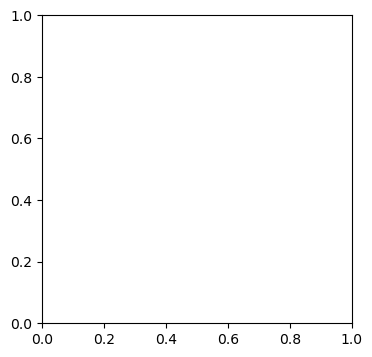

interactive(children=(FloatSlider(value=0.0, description='x_0', max=2.0, min=-2.0), FloatSlider(value=0.0, des…

In [4]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('gd'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(-0.63), 
             y_min = fixed(-0.70), 
             fun = fixed(g), 
             x_0 = FloatSlider(min=-2, max=2, step=0.1, value=0),
             y_0 = FloatSlider(min=-2, max=2, step=0.1, value=0),
             eta = FloatSlider(min = 0, max = 1, step = 0.01, value=0.2), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

### Momentum

In [5]:
V = torch.zeros(2)
learning_rate = 0.2
num_epochs = 10
beta = 0.5

mom = momentum(x_0,y_0,V,beta,learning_rate,num_epochs,g)

fig_3D = plot_3D_GD(x,y,mom[:,0],mom[:,1],g)
fig_3D.show()


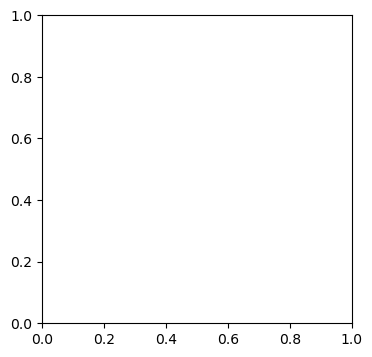

interactive(children=(FloatSlider(value=0.0, description='x_0', max=2.0, min=-2.0), FloatSlider(value=0.0, des…

In [6]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('momentum'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(-0.63), 
             y_min = fixed(-0.70), 
             fun = fixed(g), 
             x_0 = FloatSlider(min=-2, max=2, step=0.1, value=0),
             y_0 = FloatSlider(min=-2, max=2, step=0.1, value=0),
             eta = FloatSlider(min = 0, max = 1, step = 0.01, value=0.2), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

### Nesterov

In [7]:
beta = 0.5
nes = Nesterov(x_0,y_0,V,beta,learning_rate,num_epochs,g)

fig_3D = plot_3D_GD(x,y,nes[:,0],nes[:,1],g)
fig_3D.show()

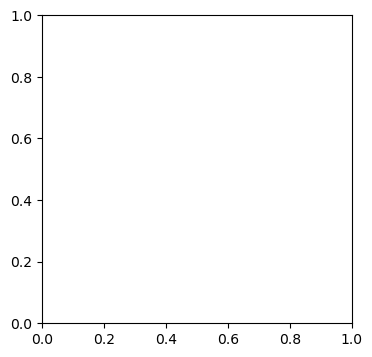

interactive(children=(FloatSlider(value=0.0, description='x_0', max=2.0, min=-2.0), FloatSlider(value=0.0, des…

In [8]:
%matplotlib inline
_ = interact(plot_2D_GD_interactive, 
            method = fixed('nesterov'),
             x = fixed(x), 
             y = fixed(y), 
             x_min = fixed(-0.63), 
             y_min = fixed(-0.70), 
             fun = fixed(g), 
             x_0 = FloatSlider(min=-2, max=2, step=0.1, value=0),
             y_0 = FloatSlider(min=-2, max=2, step=0.1, value=0),
             eta = FloatSlider(min = 0, max = 1, step = 0.01, value=0.2), 
             num_epochs = IntSlider(min = 1, max = 100, step = 1, value=10))

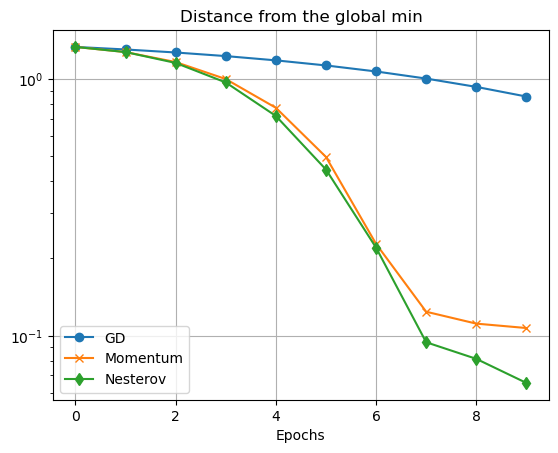

In [9]:
min_glob = torch.Tensor([-0.63,-0.7])
dist_err_gd = err(gd,min_glob,g)
dist_err_mom = err(mom,min_glob,g)
dist_err_nes = err(nes,min_glob,g)

N = range(num_epochs)
plt.semilogy(N,dist_err_gd, marker = 'o', label = 'GD')
plt.semilogy(N,dist_err_mom,marker = 'x', label = 'Momentum')
plt.semilogy(N,dist_err_nes,marker = 'd', label = 'Nesterov')

plt.grid()
plt.xlabel('Epochs')
plt.title('Distance from the global min')
plt.legend()
plt.show()
